In [59]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import datetime
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pn.extension('plotly')


In [3]:
# set file path to read CSV into a DataFrame
df = pd.read_csv("BitcoinSp500.csv")
#df.set_index("Date",inplace=True)
df

Date  Bitcoin Price  S&P500 Price
0     11/28/2011            2.5       1192.55
1     11/29/2011            2.8       1195.19
2     11/30/2011            3.0       1246.96
3      12/1/2011            3.1       1244.58
4      12/2/2011            3.1       1244.28
...          ...            ...           ...
2560   1/31/2022        38498.6       4515.55
2561    2/1/2022        38709.7       4546.54
2562    2/2/2022        36890.2       4589.32
2563    2/3/2022        37287.8       4477.44
2564    2/4/2022        41567.6       4500.54

[2565 rows x 3 columns]

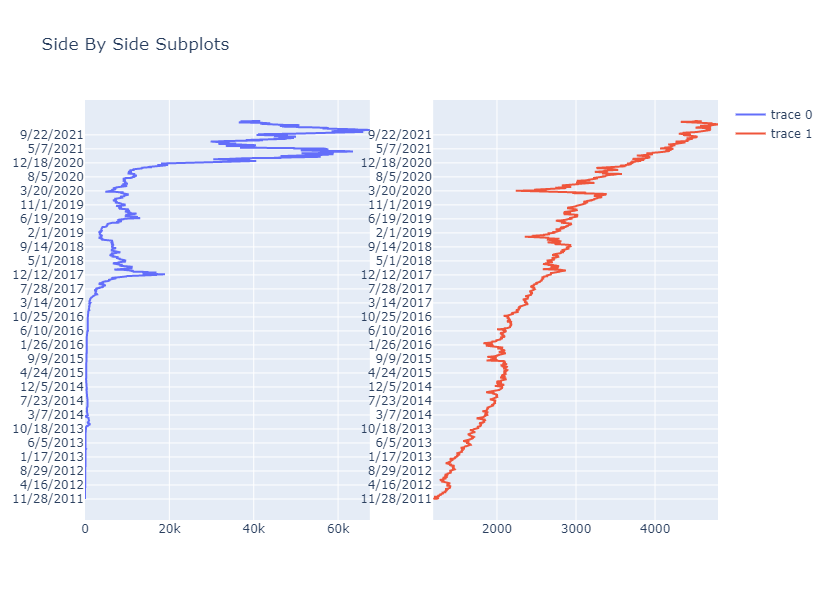

In [7]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=df["Bitcoin Price"], y=df["Date"]),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df["S&P500 Price"], y=df["Date"]),
    row=1, col=2
)

fig.update_layout(height=600, width=900, title_text="Side By Side Subplots")
fig.show()

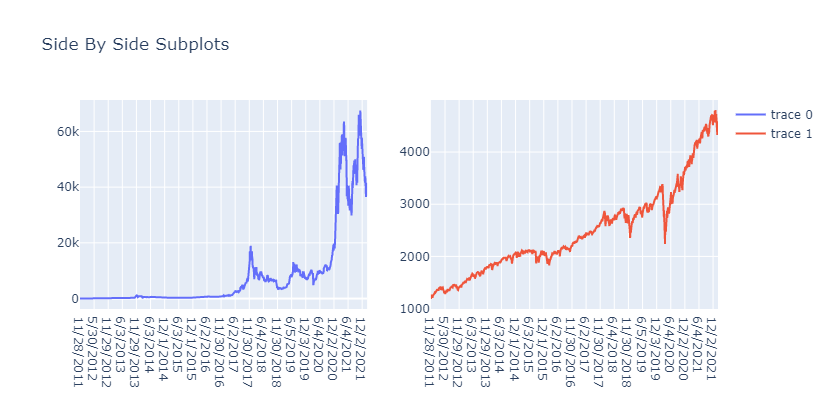

In [15]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=df["Date"], y=df["Bitcoin Price"]),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df["Date"], y=df["S&P500 Price"]),
    row=1, col=2
)

fig.update_layout(height=400, width=900, title_text="Historical Price of Bitcoin/S&P Since 11/28/2011")
fig.show()

In [27]:
import panel as pn
from panel.interact import interact
from panel import widgets
pn.extension()

In [39]:
btc = pd.read_csv('BtcReturns.csv')
btc = btc.rename(columns = {'Unnamed: 0':'Date'}).dropna()
btc

Date     Price
1     2011-11-29  0.120000
2     2011-11-30  0.071429
3     2011-12-01  0.033333
4     2011-12-02  0.000000
5     2011-12-03 -0.096774
...          ...       ...
3718  2022-02-01  0.005483
3719  2022-02-02 -0.047004
3720  2022-02-03  0.010778
3721  2022-02-04  0.114777
3722  2022-02-05 -0.004010

[3722 rows x 2 columns]

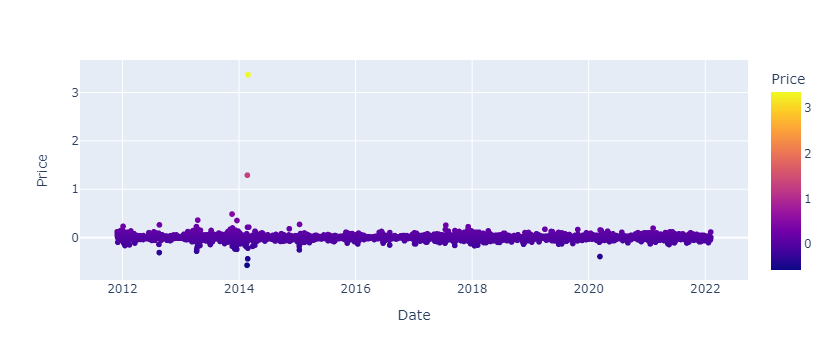

In [60]:
fig = px.line(btc, x="Date", y="Price", color='Price')
fig2 = px.scatter(btc, x="Date", y="Price", color='Price')
fig2.show()

In [61]:
# Create row
row = pn.Row(fig, fig2)
row

Row
    [0] Plotly(Figure)
    [1] Plotly(Figure)

In [62]:
# Create tabs
tabs = pn.Tabs(
    ("Correlations", fig),
    ("Time Series", fig2))
tabs

Tabs
    [0] Plotly(Figure, name='Correlations')
    [1] Plotly(Figure, name='Time Series', visible=False)

In [28]:
# Define function to choose a year
def choose_year(year):
    return year

In [31]:
# Declare one list of years to be used in a Panel select list
list_of_years = df["Date"]
interact(choose_year, year=list_of_years)

Column
    [0] Column
        [0] Select(name='year', options=['11/28/2011', ...], value='11/28/2011')
    [1] Row
        [0] Markdown(str, name='interactive01562')

In [40]:
data = df

# Create tabs
tabs = pn.Tabs(
    ("Correlations", scatter_plot),
    ("Time Series", bar_plot))
tabs

NameError: name 'scatter_plot' is not defined

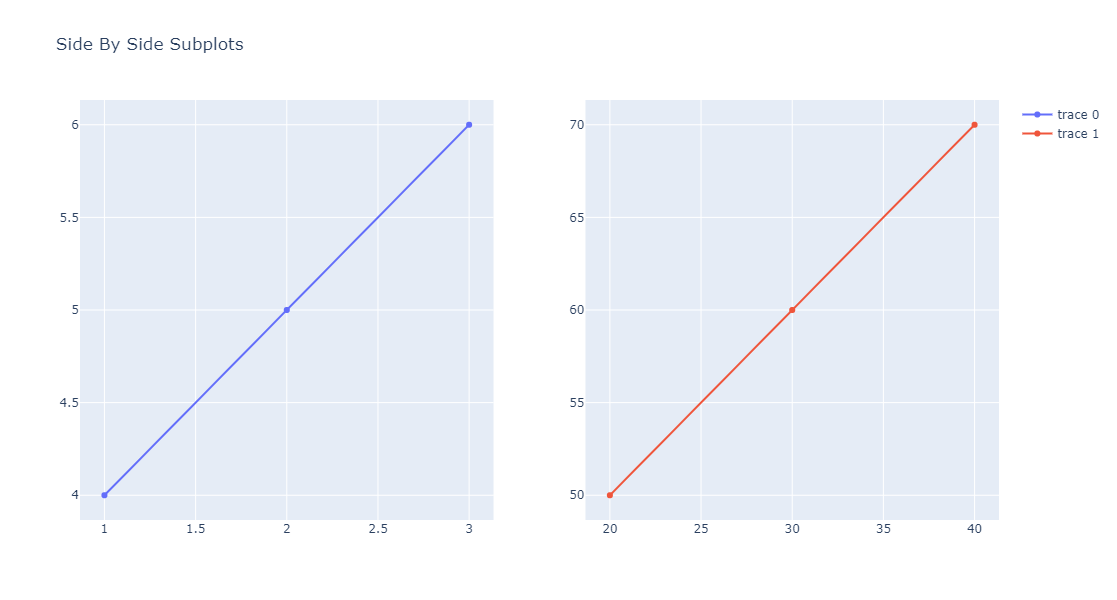

In [63]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

In [66]:
btc.index.year


AttributeError: 'Int64Index' object has no attribute 'year'

In [92]:
btc4 = btc
#btc4 = btc4.set_index("Date")
btc4

Date     Price
1     2011-11-29  0.120000
2     2011-11-30  0.071429
3     2011-12-01  0.033333
4     2011-12-02  0.000000
5     2011-12-03 -0.096774
...          ...       ...
3718  2022-02-01  0.005483
3719  2022-02-02 -0.047004
3720  2022-02-03  0.010778
3721  2022-02-04  0.114777
3722  2022-02-05 -0.004010

[3722 rows x 2 columns]

In [97]:
btc4 = pd.read_csv('BtcReturns.csv',parse_dates=True, index_col='Unnamed: 0').dropna()
# btc4 = btc.rename(columns = {'Unnamed: 0':'Date'}).dropna()
btc4

Price
2011-11-29  0.120000
2011-11-30  0.071429
2011-12-01  0.033333
2011-12-02  0.000000
2011-12-03 -0.096774
...              ...
2022-02-01  0.005483
2022-02-02 -0.047004
2022-02-03  0.010778
2022-02-04  0.114777
2022-02-05 -0.004010

[3722 rows x 1 columns]

<AxesSubplot:>

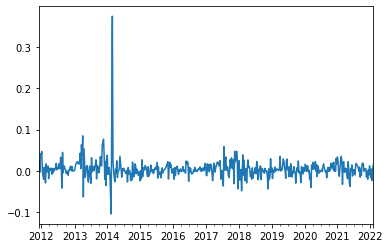

In [101]:
weekly = btc4['Price'].resample('W').mean()
weekly.plot()

In [107]:
import statsmodels.api as sm
btcprice_noise, btcprice_trend = sm.tsa.filters.hpfilter(btc4['Price'])

<AxesSubplot:>

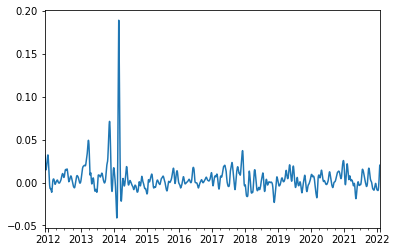

In [108]:
btcprice_trend.plot()

<AxesSubplot:>

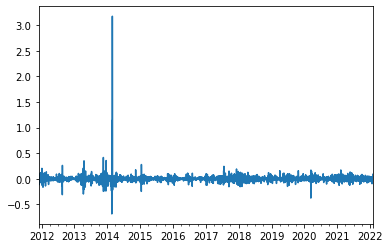

In [109]:
btcprice_noise.plot()

<AxesSubplot:>

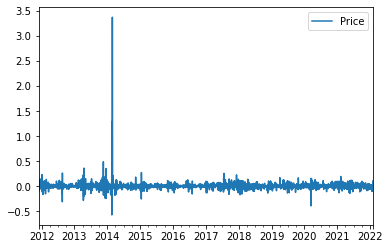

In [105]:
btc4.plot()

In [111]:
btc4.Price.autocorr(lag=24)

-0.0024836889500562953

In [112]:
  from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

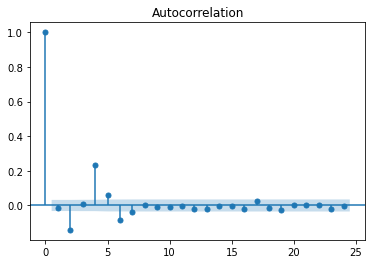

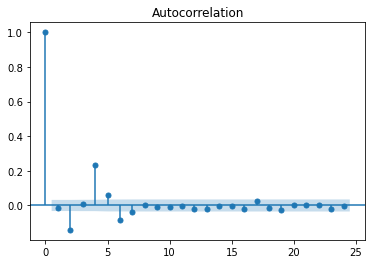

In [115]:
plot_acf(btc4.Price, lags=24)

In [116]:
from statsmodels.tsa.stattools import adfuller
adfuller(btc4.Yield)

AttributeError: 'DataFrame' object has no attribute 'Yield'